## Dataset Overview

In [250]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import librosa
import librosa.display
from IPython.display import Audio
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, LSTM, SimpleRNN,AveragePooling1D,Reshape
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, EarlyStopping 
from itertools import islice 
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")


## Dataset 1

In [146]:
# Defining the folder path
audio_folder_path = 'Audio1/1/'
audio_directories = os.listdir(audio_folder_path)

In [147]:
# Initializing lists
emotion_list = []
audio_file_paths = []

# Iterating through each directory and audio file
for directory in audio_directories:
    actor_files = os.listdir(audio_folder_path + directory)
    for audio_file in actor_files:
        emotion_part = audio_file.split('.')[0].split('-')[2]
        emotion_list.append(int(emotion_part))
        audio_file_paths.append(audio_folder_path + directory + '/' + audio_file)

In [148]:
# Creating DataFrames for emotions and file paths
emotion_column = pd.DataFrame(emotion_list, columns=['Emotion'])
path_column = pd.DataFrame(audio_file_paths, columns=['FilePath'])

# Concatenating the DataFrames
audio_df1 = pd.concat([emotion_column, path_column], axis=1)

emotion_mapping = {1: 'neutral', 
                   2: 'calm', 
                   3: 'happy', 
                   4: 'sad', 
                   5: 'angry', 
                   6: 'fear', 
                   7: 'disgust', 
                   8: 'surprise'}

audio_df1['Emotion'] = audio_df1['Emotion'].replace(emotion_mapping)
audio_df1.sample(5)

Emotion                                    FilePath
959   surprise  Audio1/1/Actor_24/03-01-08-02-02-01-24.wav
934       fear  Audio1/1/Actor_24/03-01-06-02-02-01-24.wav
411        sad  Audio1/1/Actor_10/03-01-04-02-01-02-10.wav
0        angry  Audio1/1/Actor_16/03-01-05-01-02-01-16.wav
1279       sad  Audio1/1/Actor_06/03-01-04-01-02-01-06.wav

In [149]:
#number of audio files
audio_df1.shape

(1440, 2)

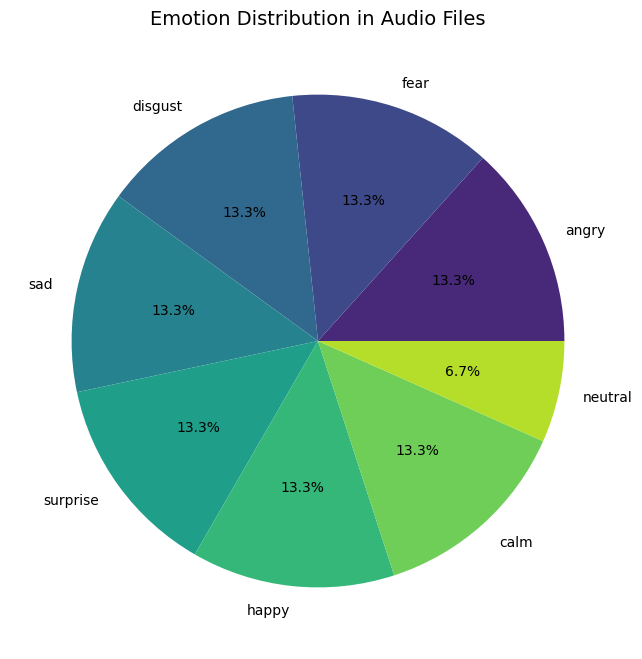

In [150]:
#create a pie chart
emotion_counts = audio_df1['Emotion'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(emotion_counts)))
plt.title('Emotion Distribution in Audio Files', fontsize=14)
plt.show()

## Dataset 2

In [151]:
# Defining the folder path
audio_folder_path_2 = 'Audio2/'
audio_files_2 = os.listdir(audio_folder_path_2)

In [152]:
# Initializing lists
emotion_list_2 = []
audio_file_paths_2 = []

# Iterating through each audio file
for audio_file in audio_files_2:
    audio_file_paths_2.append(audio_folder_path_2 + audio_file)
    file_parts = audio_file.split('_')
    if file_parts[2] == 'SAD':
        emotion_list_2.append('sad')
    elif file_parts[2] == 'ANG':
        emotion_list_2.append('angry')
    elif file_parts[2] == 'DIS':
        emotion_list_2.append('disgust')
    elif file_parts[2] == 'FEA':
        emotion_list_2.append('fear')
    elif file_parts[2] == 'HAP':
        emotion_list_2.append('happy')
    elif file_parts[2] == 'NEU':
        emotion_list_2.append('neutral')
    else:
        emotion_list_2.append('Unknown')

In [153]:
emotion_column_2 = pd.DataFrame(emotion_list_2, columns=['Emotion'])
path_column_2 = pd.DataFrame(audio_file_paths_2, columns=['FilePath'])

# Concatenating the DataFrames
audio_df2 = pd.concat([emotion_column_2, path_column_2], axis=1)
audio_df2.sample(5)

Emotion                    FilePath
1544      sad  Audio2/1025_IEO_SAD_MD.wav
5987    angry  Audio2/1086_IEO_ANG_MD.wav
5997      sad  Audio2/1014_TIE_SAD_XX.wav
5408  neutral  Audio2/1087_IWL_NEU_XX.wav
2270     fear  Audio2/1054_TIE_FEA_XX.wav

In [154]:
#number of audio files
audio_df2.shape

(7442, 2)

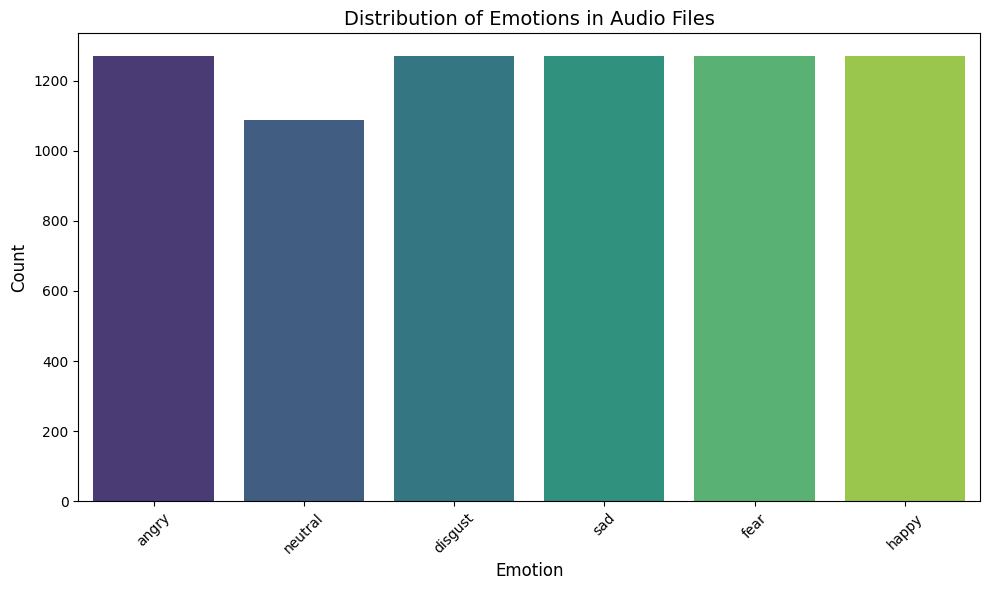

In [155]:
# Plotting the distribution of emotions as a bar graph
plt.figure(figsize=(10, 6))
sns.countplot(data=audio_df2, x='Emotion', palette='viridis')
plt.title('Distribution of Emotions in Audio Files', fontsize=14)
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Dataset 3

In [156]:
# Defining the folder path
audio_folder_path_3 = 'Audio3/3/Audio3_sub_folder/'
audio_subfolders_3 = os.listdir(audio_folder_path_3)

In [157]:
# Initializing lists for emotions and file paths
emotion_list_3 = []
audio_file_paths_3 = []

# Iterating through each subfolder and audio file
for subfolder in audio_subfolders_3:
    audio_files_3 = os.listdir(audio_folder_path_3 + subfolder)
    
    for audio_file in audio_files_3:
        file_parts = audio_file.split('.')[0].split('_')[2]
        if file_parts == 'ps':
            emotion_list_3.append('surprise')
        else:
            emotion_list_3.append(file_parts)
        audio_file_paths_3.append(audio_folder_path_3 + subfolder + '/' + audio_file)

In [158]:
emotion_column_3 = pd.DataFrame(emotion_list_3, columns=['Emotion'])
path_column_3 = pd.DataFrame(audio_file_paths_3, columns=['FilePath'])

# Concatenating the DataFrames
audio_df3 = pd.concat([emotion_column_3, path_column_3], axis=1)
audio_df3.sample(5)

Emotion                                           FilePath
622        sad  Audio3/3/Audio3_sub_folder/YAF_sad/YAF_size_sa...
2059   neutral  Audio3/3/Audio3_sub_folder/OAF_neutral/OAF_whe...
677        sad  Audio3/3/Audio3_sub_folder/YAF_sad/YAF_pearl_s...
830      happy  Audio3/3/Audio3_sub_folder/YAF_happy/YAF_tip_h...
356   surprise  Audio3/3/Audio3_sub_folder/OAF_Pleasant_surpri...

In [159]:
#number of audio files
audio_df3.shape

(2800, 2)

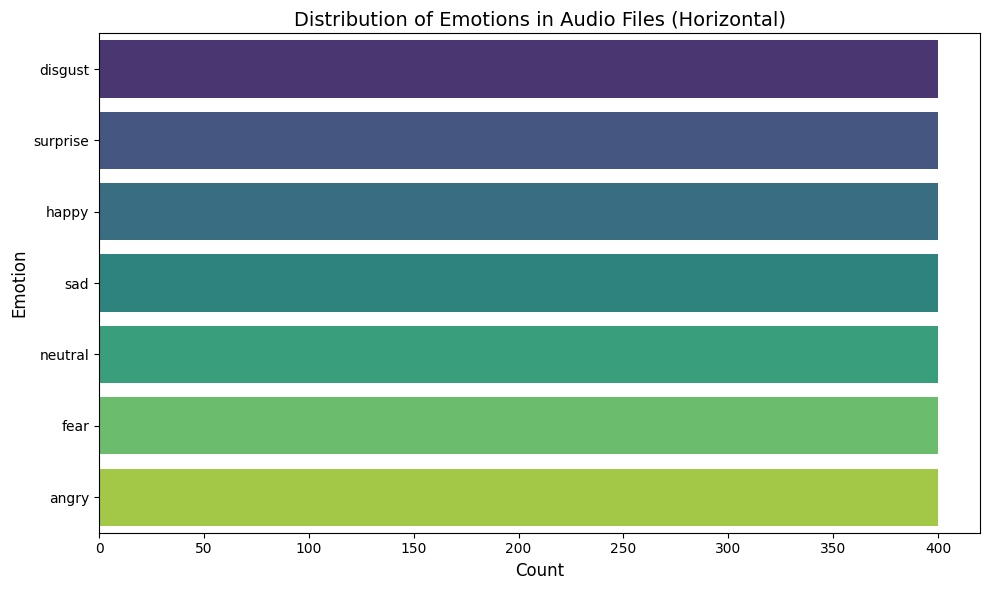

In [160]:
# Plotting a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=audio_df3, y='Emotion', palette='viridis')
plt.title('Distribution of Emotions in Audio Files (Horizontal)', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Emotion', fontsize=12)
plt.tight_layout()
plt.show()

## Dataset 4

In [161]:
# Defining the folder path for the audio files
audio_folder_path_4 = 'Audio4/'
audio_files_4 = os.listdir(audio_folder_path_4)

In [162]:
# Initializing lists to store emotions and file paths
emotion_list_4 = []
audio_file_paths_4 = []

# Iterating through each audio file
for audio_file in audio_files_4:
    audio_file_paths_4.append(audio_folder_path_4 + audio_file)
    file_parts = audio_file.split('_')[1]
    emotion_code = file_parts[:-6]  
    if emotion_code == 'a':
        emotion_list_4.append('angry')
    elif emotion_code == 'd':
        emotion_list_4.append('disgust')
    elif emotion_code == 'f':
        emotion_list_4.append('fear')
    elif emotion_code == 'h':
        emotion_list_4.append('happy')
    elif emotion_code == 'n':
        emotion_list_4.append('neutral')
    elif emotion_code == 'sa':
        emotion_list_4.append('sad')
    else:
        emotion_list_4.append('surprise')

In [163]:
emotion_column_4 = pd.DataFrame(emotion_list_4, columns=['Emotion'])
path_column_4 = pd.DataFrame(audio_file_paths_4, columns=['FilePath'])

# Concatenating the two DataFrames
audio_df4 = pd.concat([emotion_column_4, path_column_4], axis=1)
audio_df4.head()

Emotion            FilePath
0       sad  Audio4/JK_sa01.wav
1       sad  Audio4/JK_sa15.wav
2   neutral   Audio4/DC_n13.wav
3  surprise  Audio4/DC_su09.wav
4   neutral   Audio4/DC_n07.wav

In [164]:
#number of audio files
audio_df4.shape

(480, 2)

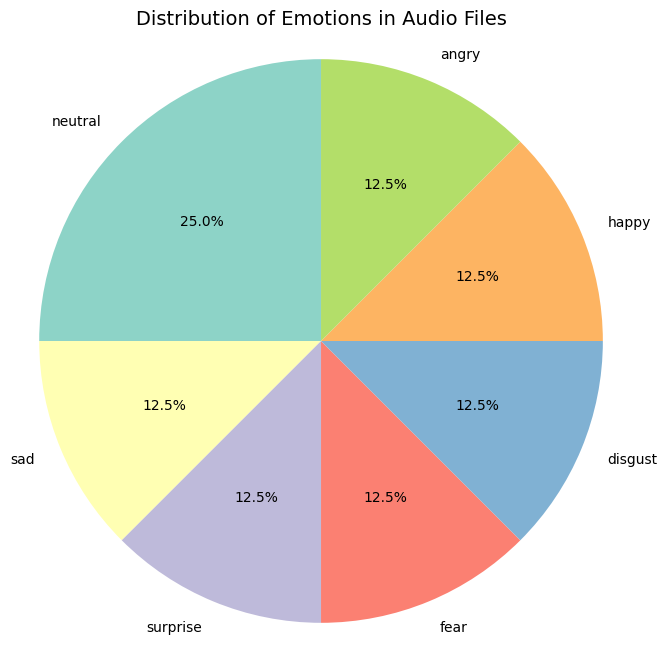

In [165]:
# Create pie chart
emotion_counts = audio_df4['Emotion'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(emotion_counts)))
plt.title('Distribution of Emotions in Audio Files', fontsize=14)
plt.axis('equal')  
plt.show()

## Combining DataFrames

In [166]:
# Concatentate the different dataframe
data_path = pd.concat([audio_df1, audio_df2, audio_df3, audio_df4], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.sample(5)


Emotion                                           FilePath
1721  surprise  Audio3/3/Audio3_sub_folder/YAF_pleasant_surpri...
940      happy  Audio3/3/Audio3_sub_folder/YAF_happy/YAF_which...
608    disgust                         Audio2/1037_WSI_DIS_XX.wav
187    disgust                         Audio2/1052_IEO_DIS_MD.wav
849      happy  Audio3/3/Audio3_sub_folder/YAF_happy/YAF_lose_...

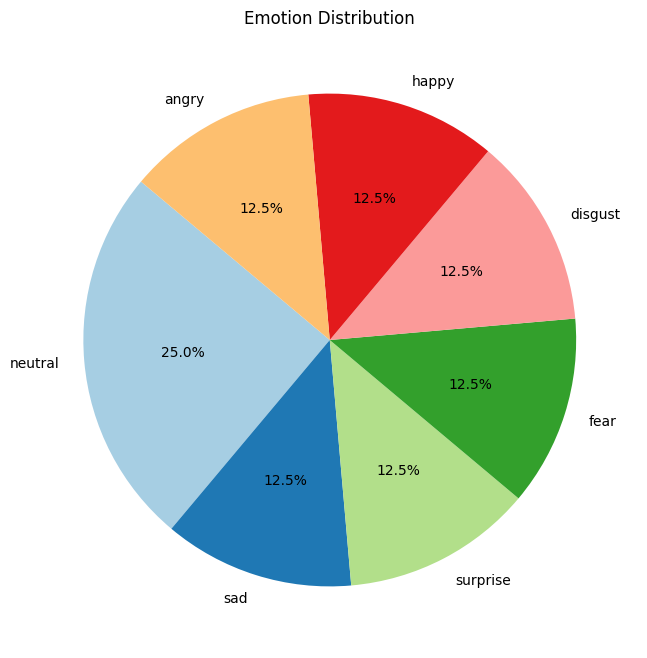

In [262]:
# Plotting a pie chart
plt.figure(figsize=(8, 8))
emotion_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Emotion Distribution')
plt.ylabel('')
plt.show()


## Visualizing the Audio Files

### Waveplot and spectogram

In [168]:
# Create wave plot function
def generate_waveplot(audio_data, sr, emotion):
    plt.figure(figsize=(12, 4))  
    plt.title(f'Waveform for {emotion} emotion audio', size=16)  
    librosa.display.waveshow(audio_data, sr=sr)  
    plt.show()

In [169]:
#create spectrogram
def create_spectrogram(data, sample_rate, emotion):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(10, 5))
    plt.title('Spectrogram for audio with {} emotion'.format(emotion), size=15)
    librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz', cmap='coolwarm')
    plt.colorbar()
    plt.show()

#### Surprise Emotion

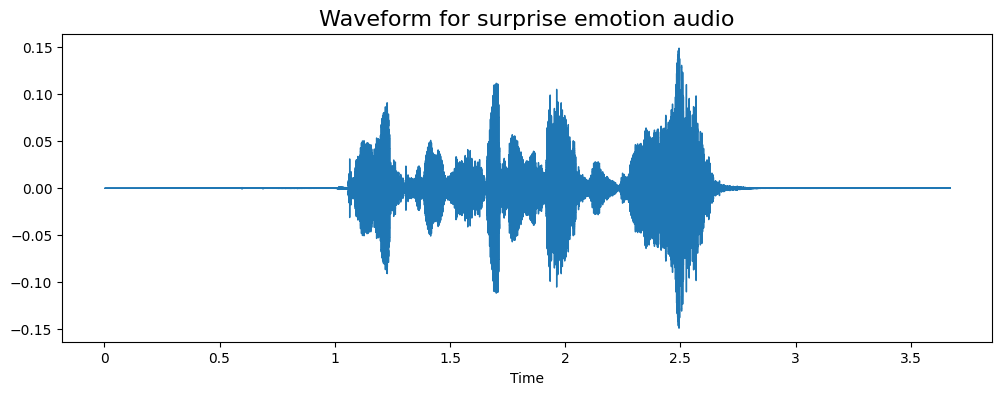

In [170]:
#visualize wave plot
emotion_to_plot = 'surprise' 
file_path = data_path.loc[data_path.Emotion == emotion_to_plot, 'FilePath'].iloc[100]  
audio_data, sample_rate = librosa.load(file_path)
generate_waveplot(audio_data, sample_rate, emotion_to_plot)
Audio(file_path)

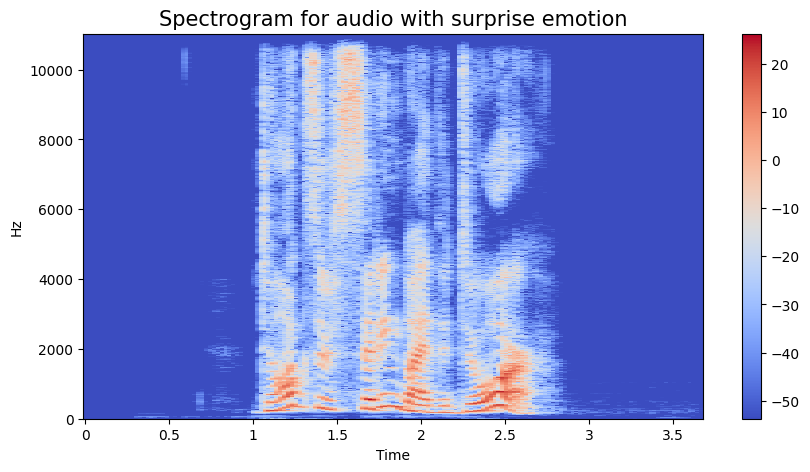

In [171]:
#create spectogram
emotion_to_plot = 'surprise' 
file_path = data_path.loc[data_path.Emotion == emotion_to_plot, 'FilePath'].iloc[100]  
audio_data, sample_rate = librosa.load(file_path)
create_spectrogram(audio_data, sample_rate, emotion_to_plot)

#### Fear Emotion

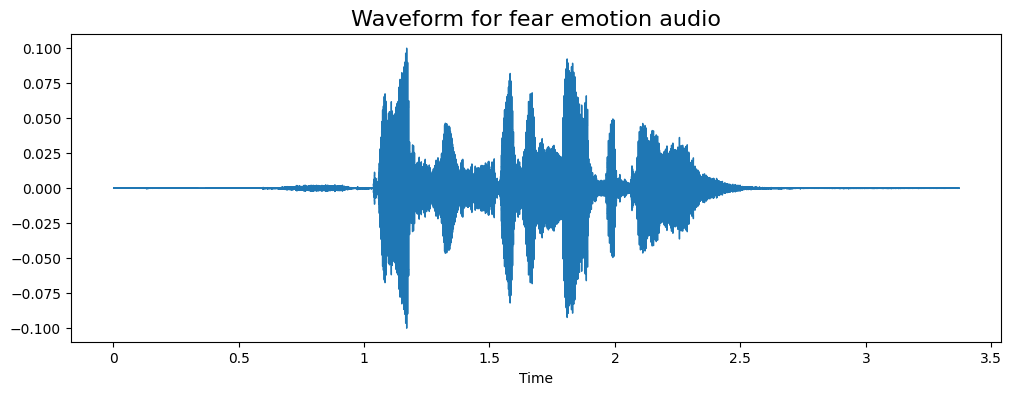

In [172]:
#visualize wave plot
emotion_to_plot = 'fear' 
file_path = data_path.loc[data_path.Emotion == emotion_to_plot, 'FilePath'].iloc[100]  
audio_data, sample_rate = librosa.load(file_path)
generate_waveplot(audio_data, sample_rate, emotion_to_plot)
Audio(file_path)

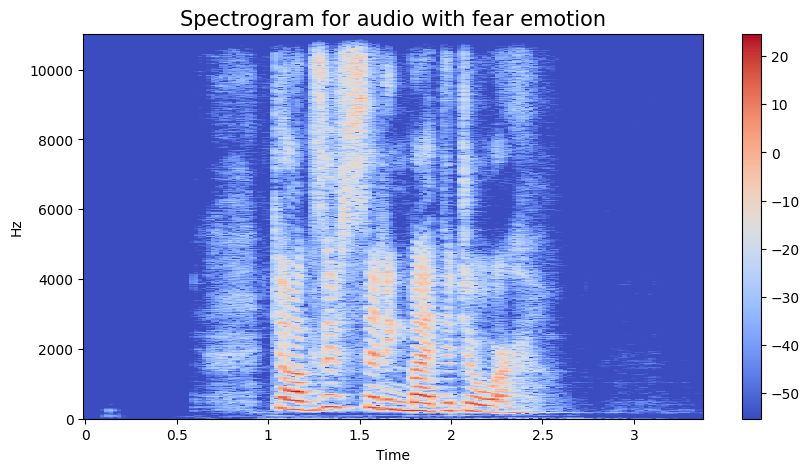

In [173]:
#create spectogram
emotion_to_plot = 'fear' 
file_path = data_path.loc[data_path.Emotion == emotion_to_plot, 'FilePath'].iloc[100]  
audio_data, sample_rate = librosa.load(file_path)
create_spectrogram(audio_data, sample_rate, emotion_to_plot)

#### Angry Emotion

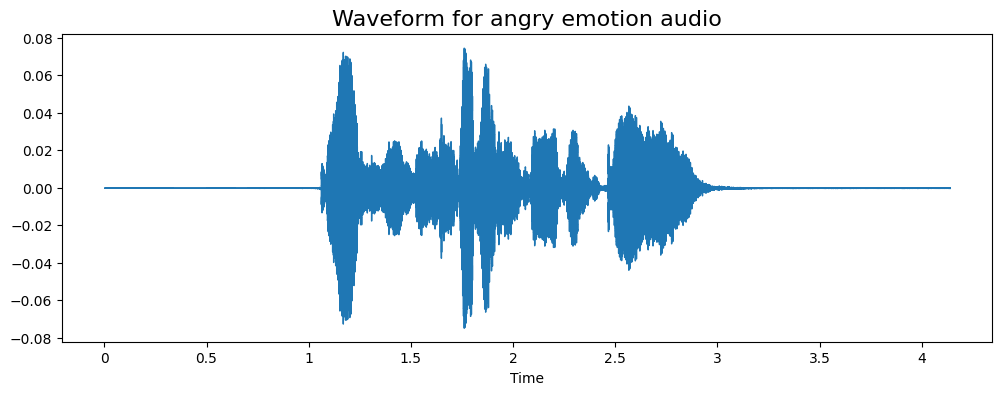

In [174]:
#visualize wave plot
emotion_to_plot = 'angry' 
file_path = data_path.loc[data_path.Emotion == emotion_to_plot, 'FilePath'].iloc[100]  
audio_data, sample_rate = librosa.load(file_path)
generate_waveplot(audio_data, sample_rate, emotion_to_plot)
Audio(file_path)

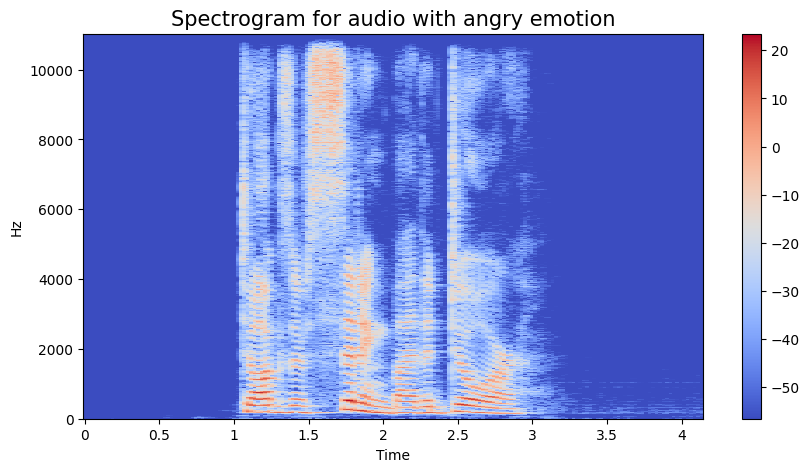

In [175]:
#create spectogram
emotion_to_plot = 'angry' 
file_path = data_path.loc[data_path.Emotion == emotion_to_plot, 'FilePath'].iloc[100]  
audio_data, sample_rate = librosa.load(file_path)
create_spectrogram(audio_data, sample_rate, emotion_to_plot)

#### Sad emotion

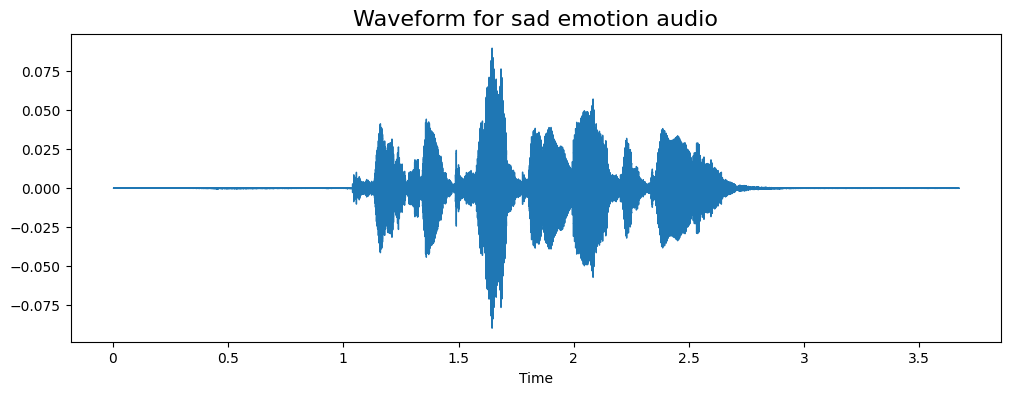

In [176]:
#visualize wave plot
emotion_to_plot = 'sad' 
file_path = data_path.loc[data_path.Emotion == emotion_to_plot, 'FilePath'].iloc[100]  
audio_data, sample_rate = librosa.load(file_path)
generate_waveplot(audio_data, sample_rate, emotion_to_plot)
Audio(file_path)

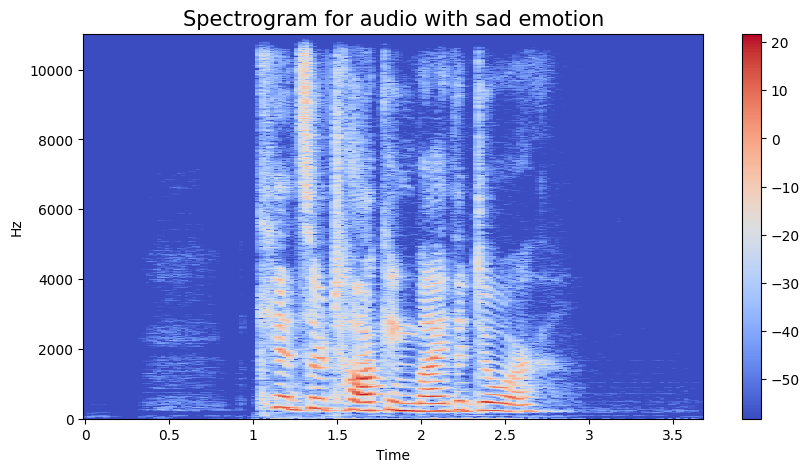

In [177]:
#create spectogram
emotion_to_plot = 'sad' 
file_path = data_path.loc[data_path.Emotion == emotion_to_plot, 'FilePath'].iloc[100]  
audio_data, sample_rate = librosa.load(file_path)
create_spectrogram(audio_data, sample_rate, emotion_to_plot)

#### Happy Emotion

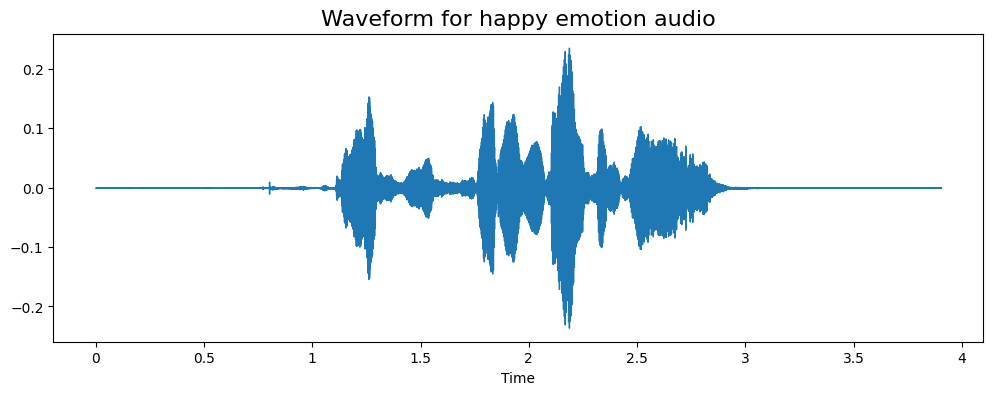

In [178]:
#visualize wave plot
emotion_to_plot = 'happy' 
file_path = data_path.loc[data_path.Emotion == emotion_to_plot, 'FilePath'].iloc[100]  
audio_data, sample_rate = librosa.load(file_path)
generate_waveplot(audio_data, sample_rate, emotion_to_plot)
Audio(file_path)

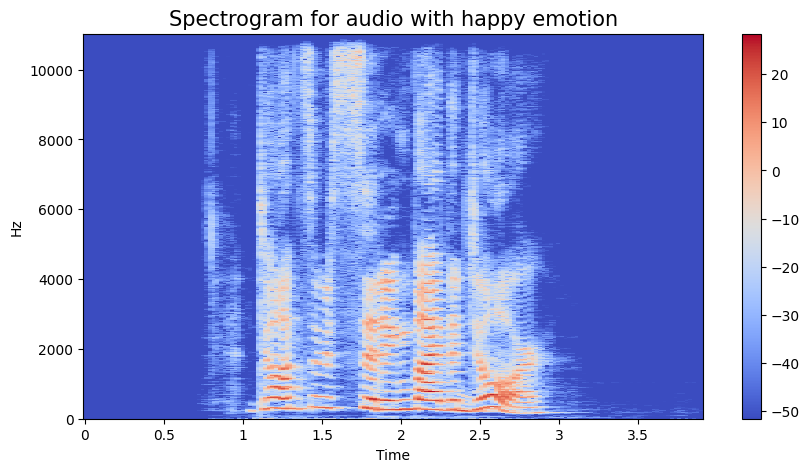

In [179]:
#create spectogram
emotion_to_plot = 'happy' 
file_path = data_path.loc[data_path.Emotion == emotion_to_plot, 'FilePath'].iloc[100]  
audio_data, sample_rate = librosa.load(file_path)
create_spectrogram(audio_data, sample_rate, emotion_to_plot)

## Data Augmentation in Audio data

#### Original Audio (Any emotion)

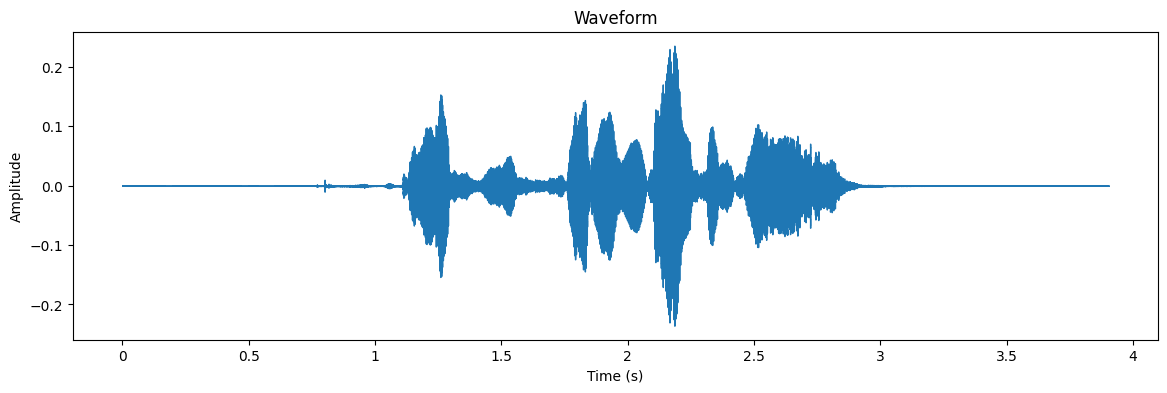

In [180]:
# Plot the waveform
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=audio_data, sr=sample_rate)  
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Play the audio
Audio(file_path)

#### Add Noise to the Audio data 

In [181]:
# Adding noise to the audio
def add_noise(data):
    noise_amplitude = 0.035 * np.random.uniform() * np.amax(data)  
    noisy_data = data + noise_amplitude * np.random.normal(size=data.shape[0])
    return noisy_data

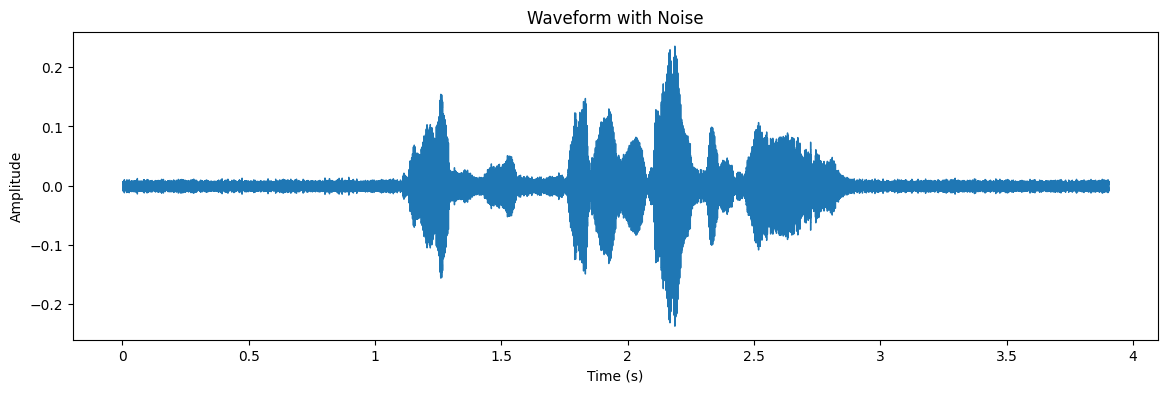

In [182]:
#add noise to the audio
x = add_noise(audio_data)

# Plot the waveform with noise
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)  
plt.title("Waveform with Noise")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()
Audio(x, rate=sample_rate)

#### Time stretching

In [183]:
# Time-stretching function with minor adjustments
def stretch(data, rate=0.8):
    stft = librosa.stft(data)
    magnitude, phase = librosa.magphase(stft)
    magnitude_stretched = librosa.effects.time_stretch(magnitude, rate=rate)
    if magnitude_stretched.shape[1] > phase.shape[1]:
        phase = librosa.util.pad_center(phase, size=magnitude_stretched.shape[1])
    elif magnitude_stretched.shape[1] < phase.shape[1]:
        phase = phase[:, :magnitude_stretched.shape[1]]
    stft_stretched = magnitude_stretched * phase
    return librosa.istft(stft_stretched)


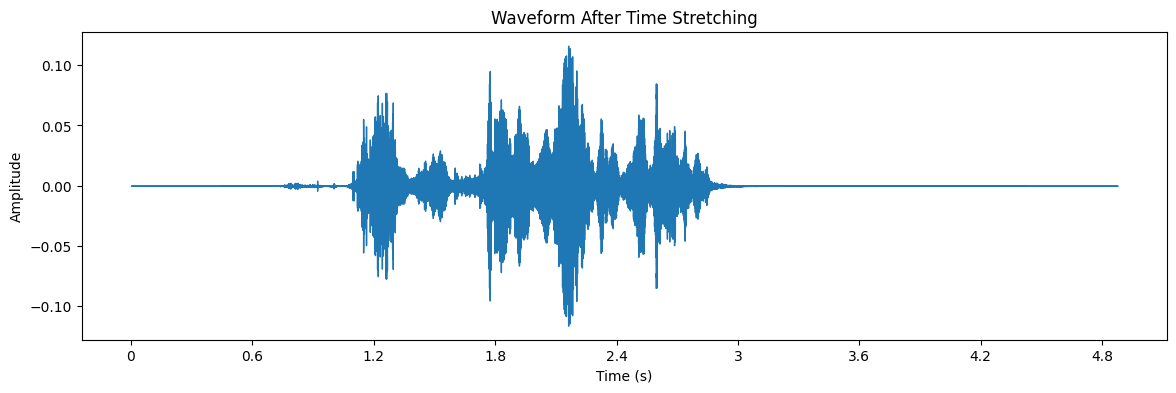

In [184]:
#Stretched audio
x = stretch(audio_data, rate=0.8)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate) 
plt.title("Waveform After Time Stretching")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()
Audio(x, rate=sample_rate)

#### Shift the Audio data

In [185]:
# Shifting the audio signal with slight modifications
def apply_shift(data):
    shift_amount = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shift_amount)

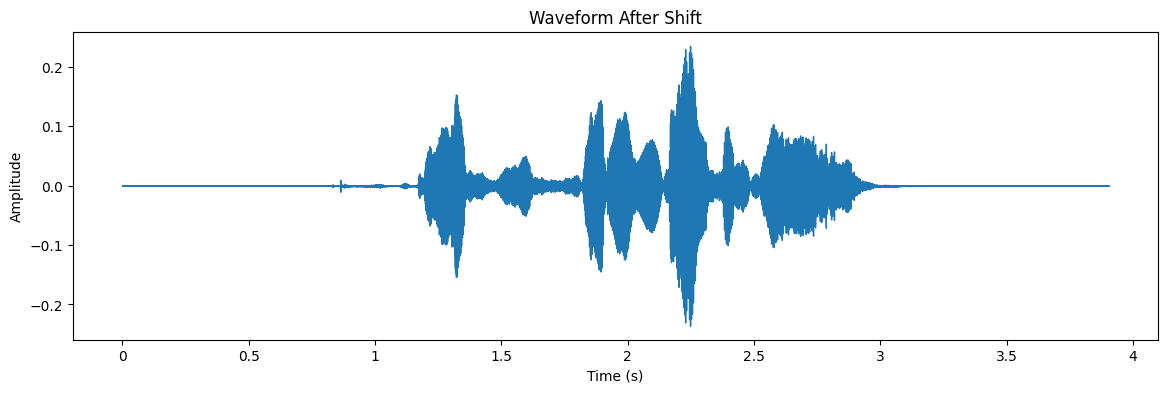

In [186]:
#Shift the audio data
x = apply_shift(audio_data)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)  
plt.title("Waveform After Shift")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()
Audio(x, rate=sample_rate)

#### Adjust pitch

In [187]:
# Pitch shifting function
def pitch_shift(data, sample_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sample_rate, n_steps=pitch_factor)

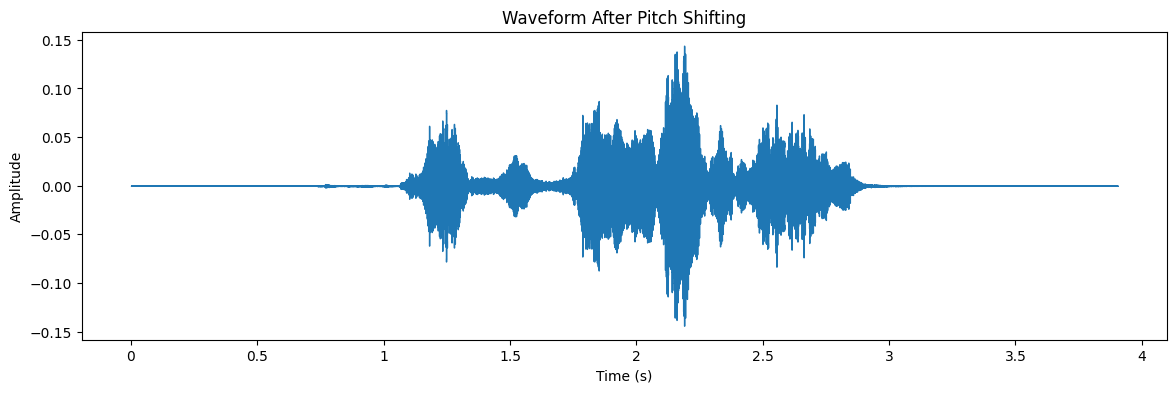

In [188]:
# Apply pitch-shifting
x = pitch_shift(audio_data, sample_rate)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)  
plt.title("Waveform After Pitch Shifting")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()
Audio(x, rate=sample_rate)

## Extract features from Audio file

In [189]:
def extract_audio_features(audio_data):
    # Zero Crossing Rate (ZCR)
    feature_vector = np.array([])
    zcr_feature = np.mean(librosa.feature.zero_crossing_rate(y=audio_data).T, axis=0)
    feature_vector = np.hstack((feature_vector, zcr_feature))  

    # Chroma Short-Time Fourier Transform (Chroma_STFT)
    audio_stft = np.abs(librosa.stft(audio_data))
    chroma_feature = np.mean(librosa.feature.chroma_stft(S=audio_stft, sr=sample_rate).T, axis=0)
    feature_vector = np.hstack((feature_vector, chroma_feature))  

    # Mel-frequency Cepstral Coefficients (MFCC)
    mfcc_feature = np.mean(librosa.feature.mfcc(y=audio_data, sr=sample_rate).T, axis=0)
    feature_vector = np.hstack((feature_vector, mfcc_feature))  

    # Root Mean Square (RMS) Energy
    rms_feature = np.mean(librosa.feature.rms(y=audio_data).T, axis=0)
    feature_vector = np.hstack((feature_vector, rms_feature))  

    # Mel Spectrogram
    mel_feature = np.mean(librosa.feature.melspectrogram(y=audio_data, sr=sample_rate).T, axis=0)
    feature_vector = np.hstack((feature_vector, mel_feature))  

    return feature_vector

In [190]:
def extract_features_from_audio_file(file_path):
    # Load audio data with specified duration and offset
    audio_data, sample_rate = librosa.load(file_path, duration=2.5, offset=0.6)
    
    # Extract features without augmentation
    original_features = extract_audio_features(audio_data)
    all_features = np.array(original_features)
    
    # Extract features with added noise
    noisy_audio_data = add_noise(audio_data)
    noisy_features = extract_audio_features(noisy_audio_data)
    all_features = np.vstack((all_features, noisy_features))  
    
    # Extract features with time-stretching and pitch-shifting
    stretched_audio_data = stretch(audio_data)
    stretched_and_pitched_audio = pitch_shift(stretched_audio_data, sample_rate)
    stretched_pitched_features = extract_audio_features(stretched_and_pitched_audio)
    all_features = np.vstack((all_features, stretched_pitched_features))  
    
    return all_features

In [191]:
#extract features from audio file
X, Y = [], []
for path, emotion in zip(data_path.FilePath, data_path.Emotion):
# for path, emotion in islice(zip(data_path.FilePath, data_path.Emotion), 1000):
    feature = extract_features_from_audio_file(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [192]:
#getting the shapes of the data
len(X), len(Y), data_path.FilePath.shape

(36486, 36486, (12162,))

## Audio data to numeric data

In [193]:
# Create a DataFrame 
feature_df = pd.DataFrame(X)
feature_df['Labels'] = Y

# Save the features and labels to a CSV file
feature_df.to_csv('features.csv', index=False)
feature_df.head()

0         1         2         3         4         5         6  \
0  0.204540  0.522053  0.470343  0.491423  0.560348  0.548752  0.613287   
1  0.341964  0.696073  0.676911  0.683034  0.717429  0.700402  0.710720   
2  0.158073  0.524794  0.468931  0.462897  0.477635  0.442740  0.537695   
3  0.189815  0.559744  0.520431  0.484952  0.440133  0.394637  0.402852   
4  0.322220  0.745489  0.749029  0.740298  0.717248  0.690023  0.628684   

          7         8         9  ...       153       154       155       156  \
0  0.551326  0.534302  0.608861  ...  0.006682  0.004037  0.004855  0.004624   
1  0.630033  0.623535  0.691735  ...  0.009916  0.007155  0.007668  0.007144   
2  0.503580  0.505158  0.569229  ...  0.002479  0.001500  0.000764  0.000564   
3  0.411464  0.440253  0.506418  ...  0.002601  0.002952  0.003851  0.003154   
4  0.587428  0.597775  0.617096  ...  0.003364  0.003767  0.004508  0.003924   

        157       158       159       160       161  Labels  
0  0.005723  0.006007  0.006103  0.005150  0.000251   angry  
1  0.008620  0.009066  0.009256  0.007843  0.003215   angry  
2  0.000794  0.000752  0.000919  0.000411  0.000029   angry  
3  0.002964  0.002586  0.002761  0.001653  0.000115    fear  
4  0.003756  0.003382  0.003577  0.002482  0.000887    fear  

[5 rows x 163 columns]

In [194]:
feature_df.head()

0         1         2         3         4         5         6  \
0  0.204540  0.522053  0.470343  0.491423  0.560348  0.548752  0.613287   
1  0.341964  0.696073  0.676911  0.683034  0.717429  0.700402  0.710720   
2  0.158073  0.524794  0.468931  0.462897  0.477635  0.442740  0.537695   
3  0.189815  0.559744  0.520431  0.484952  0.440133  0.394637  0.402852   
4  0.322220  0.745489  0.749029  0.740298  0.717248  0.690023  0.628684   

          7         8         9  ...       153       154       155       156  \
0  0.551326  0.534302  0.608861  ...  0.006682  0.004037  0.004855  0.004624   
1  0.630033  0.623535  0.691735  ...  0.009916  0.007155  0.007668  0.007144   
2  0.503580  0.505158  0.569229  ...  0.002479  0.001500  0.000764  0.000564   
3  0.411464  0.440253  0.506418  ...  0.002601  0.002952  0.003851  0.003154   
4  0.587428  0.597775  0.617096  ...  0.003364  0.003767  0.004508  0.003924   

        157       158       159       160       161  Labels  
0  0.005723  0.006007  0.006103  0.005150  0.000251   angry  
1  0.008620  0.009066  0.009256  0.007843  0.003215   angry  
2  0.000794  0.000752  0.000919  0.000411  0.000029   angry  
3  0.002964  0.002586  0.002761  0.001653  0.000115    fear  
4  0.003756  0.003382  0.003577  0.002482  0.000887    fear  

[5 rows x 163 columns]

In [195]:
#check its shape
feature_df.shape

(36486, 163)

## Data Preparation for Modelling

In [196]:
#Split X and Y data
x = feature_df.iloc[: ,:-1].values
Y = feature_df['Labels'].values

In [197]:
#One hot encoding the labels
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [198]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(x, Y, random_state=0, shuffle=True)

In [199]:
# scaling our data 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [200]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

## LSTM Model

In [228]:
# Initialize the LSTM model
lstm_model = Sequential()

# First LSTM layer
lstm_model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
lstm_model.add(BatchNormalization())
lstm_model.add(Dropout(0.1))

# Second LSTM layer
lstm_model.add(LSTM(64, return_sequences=False))
lstm_model.add(BatchNormalization())
lstm_model.add(Dropout(0.1))

# Adding dense layers with ReLU activation
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dropout(0.1))

lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dropout(0.3))

# Output layer (number of units = number of classes)
lstm_model.add(Dense(y_train.shape[1], activation='softmax'))

# Summarize the model
lstm_model.summary()


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 162, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 162, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 162, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,240 (481.41 KB)

 Trainable params: 122,856 (479.91 KB)

 Non-trainable params: 384 (1.50 KB)

In [229]:
# Compile the model
lstm_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

history_lstm=lstm_model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 95s 108ms/step - accuracy: 0.2152 - loss: 1.9377 - val_accuracy: 0.1522 - val_loss: 2.1673
Epoch 2/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 82s 95ms/step - accuracy: 0.2594 - loss: 1.8439 - val_accuracy: 0.2264 - val_loss: 1.8734
Epoch 3/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 81s 94ms/step - accuracy: 0.2799 - loss: 1.7997 - val_accuracy: 0.2826 - val_loss: 1.7841
Epoch 4/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 81s 95ms/step - accuracy: 0.2941 - loss: 1.7549 - val_accuracy: 0.2922 - val_loss: 1.7487
Epoch 5/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 80s 94ms/step - accuracy: 0.3029 - loss: 1.7232 - val_accuracy: 0.3073 - val_loss: 1.6917
Epoch 6/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 80s 94ms/step - accuracy: 0.3138 - loss: 1.6757 - val_accuracy: 0.2995 - val_loss: 1.7603
Epoch 7/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 80s 94ms/step - accuracy: 0.3301 - loss: 1.6365 - val_accuracy: 0.3008 - val_loss: 1.6983
Epoch 8/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 80s 93ms/step - accuracy: 0.3348 - loss: 1.6249 -

In [230]:
# Evaluate the model
test_loss, test_accuracy = lstm_model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

286/286 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.5411 - loss: 1.1687
Test Accuracy: 53.74%


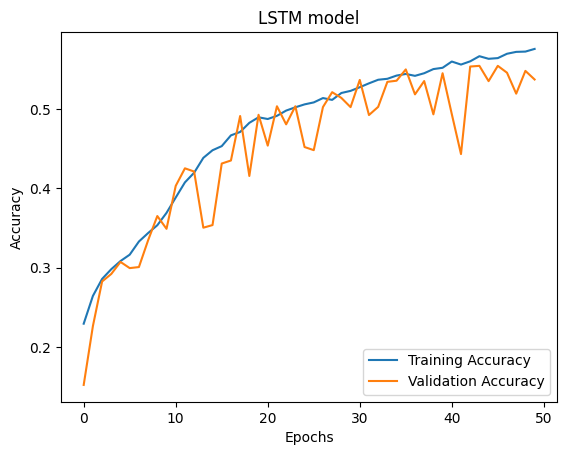

In [231]:
#plot training and validation accuracy
plt.plot(history_lstm.history['accuracy'], label='Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM model')
plt.legend(loc='lower right')
plt.show()

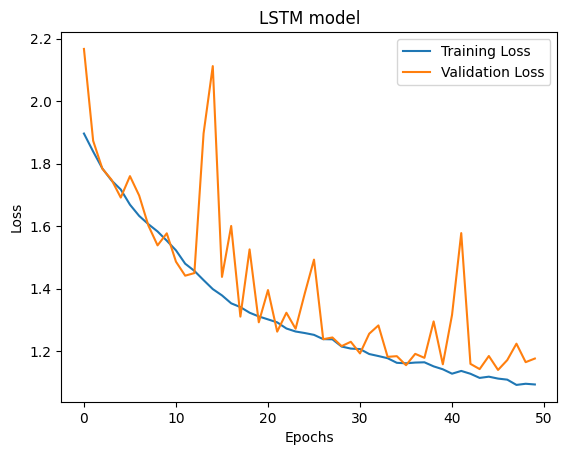

In [232]:
#plot training and validation loss
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM model')
plt.legend()
plt.show()

In [267]:
# predicting on test data.
pred_test_3 = lstm_model.predict(x_test)
y_pred_3 = encoder.inverse_transform(pred_test_3)
y_test_3 = encoder.inverse_transform(y_test)

286/286 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step


In [268]:
#compare the results with actual
df3 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df3['Predicted Labels'] = y_pred_3.flatten()
df3['Actual Labels'] = y_test_3.flatten()
df3.sample(5)

Predicted Labels Actual Labels
2913              sad           sad
425              fear         happy
891             happy          fear
2722            happy       neutral
2687             fear           sad

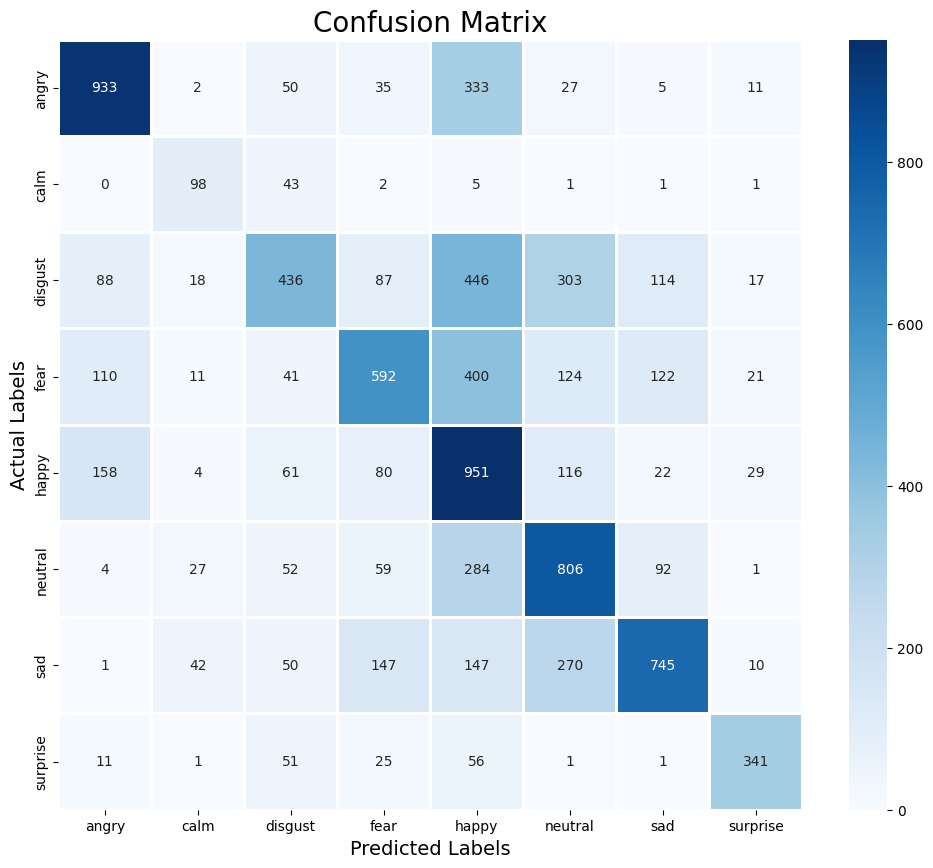

In [270]:
#create a confusion matrix
cm_3 = confusion_matrix(y_test_3, y_pred_3)
plt.figure(figsize = (12, 10))
cm_3= pd.DataFrame(cm_3 , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm_3, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [271]:
print(cm_3)

         angry calm disgust fear happy neutral  sad surprise
angry      933    2      50   35   333      27    5       11
calm         0   98      43    2     5       1    1        1
disgust     88   18     436   87   446     303  114       17
fear       110   11      41  592   400     124  122       21
happy      158    4      61   80   951     116   22       29
neutral      4   27      52   59   284     806   92        1
sad          1   42      50  147   147     270  745       10
surprise    11    1      51   25    56       1    1      341


In [273]:
#classification report
print(classification_report(y_test_3, y_pred_3))

              precision    recall  f1-score   support

       angry       0.71      0.67      0.69      1396
        calm       0.48      0.65      0.55       151
     disgust       0.56      0.29      0.38      1509
        fear       0.58      0.42      0.48      1421
       happy       0.36      0.67      0.47      1421
     neutral       0.49      0.61      0.54      1325
         sad       0.68      0.53      0.59      1412
    surprise       0.79      0.70      0.74       487

    accuracy                           0.54      9122
   macro avg       0.58      0.57      0.56      9122
weighted avg       0.57      0.54      0.54      9122



## CNN Model

In [208]:
model = Sequential()

# Convolutional layers with BatchNormalization
model.add(Conv1D(512, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))

model.add(Conv1D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))

model.add(Conv1D(128, kernel_size=3, activation='relu'))  # Reduced filters here
model.add(BatchNormalization())
model.add(AveragePooling1D(pool_size=3, strides=2, padding='same'))

# model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(units=128, activation='relu', kernel_regularizer=l2(0.001)))  # Lower L2 regularization
model.add(Dropout(0.1))  # Increased dropout rate

model.add(Dense(units=8, activation='softmax'))

model.summary()

# Compile the model with a smaller learning rate
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train the model for more epochs
history = model.fit(
    x_train, y_train,
    batch_size=32,  
    epochs=50,  
    validation_data=(x_test, y_test),
    callbacks=[lr_scheduler]
)

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_31 (Conv1D)              │ (None, 160, 512)       │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 160, 512)       │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_22 (MaxPooling1D) │ (None, 80, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_32 (Conv1D)              │ (None, 78, 256)        │       393,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 78, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_23 (MaxPooling1D) │ (None, 39, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_33 (Conv1D)              │ (None, 37, 128)        │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 37, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d_9             │ (None, 19, 128)        │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 2432)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       311,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 809,992 (3.09 MB)

 Trainable params: 808,200 (3.08 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 57s 66ms/step - accuracy: 0.3986 - loss: 1.7897 - val_accuracy: 0.4663 - val_loss: 1.5074 - learning_rate: 5.0000e-04
Epoch 2/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 58s 68ms/step - accuracy: 0.5232 - loss: 1.3635 - val_accuracy: 0.5417 - val_loss: 1.2943 - learning_rate: 5.0000e-04
Epoch 3/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 57s 67ms/step - accuracy: 0.5499 - loss: 1.2455 - val_accuracy: 0.5515 - val_loss: 1.2356 - learning_rate: 5.0000e-04
Epoch 4/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 60s 70ms/step - accuracy: 0.5665 - loss: 1.1792 - val_accuracy: 0.5650 - val_loss: 1.1845 - learning_rate: 5.0000e-04
Epoch 5/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 59s 69ms/step - accuracy: 0.5924 - loss: 1.1191 - val_accuracy: 0.5093 - val_loss: 1.3756 - learning_rate: 5.0000e-04
Epoch 6/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 61s 71ms/step - accuracy: 0.6123 - loss: 1.0733 - val_accuracy: 0.5555 - val_loss: 1.2213 - learning_rate: 5.0000e-04
Epoch 7/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 60s 70ms/ste

In [263]:
#passing test data in the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6523 - loss: 1.3446
Test Accuracy: 64.80%


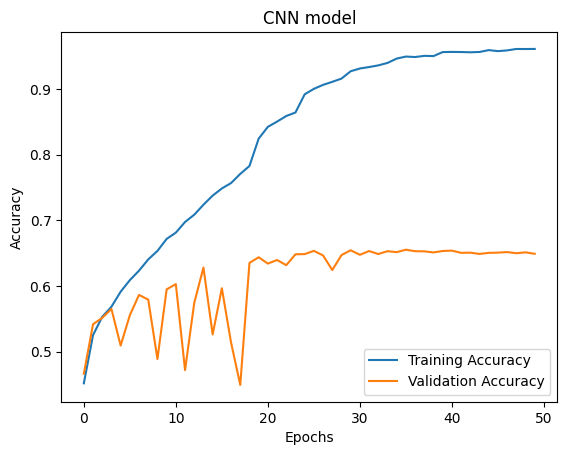

In [210]:
#plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN model')
plt.legend(loc='lower right')
plt.show()

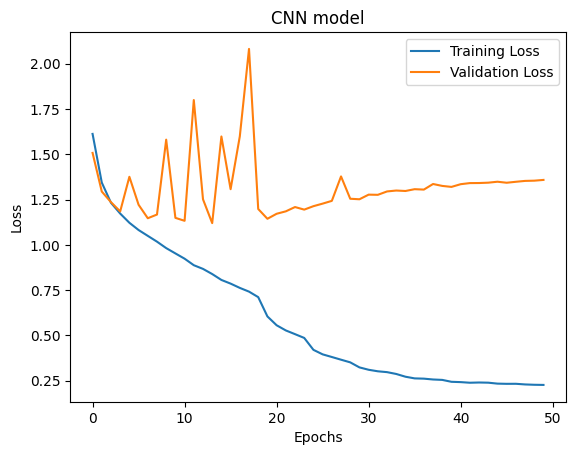

In [211]:
#plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN model')
plt.legend()
plt.show()

In [212]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)
y_test_1 = encoder.inverse_transform(y_test)

286/286 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


In [213]:
#compare the results with actual
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_1.flatten()
df.sample(5)

Predicted Labels Actual Labels
946             angry         angry
427             happy         angry
5192          disgust       disgust
3187              sad           sad
3373          disgust         happy

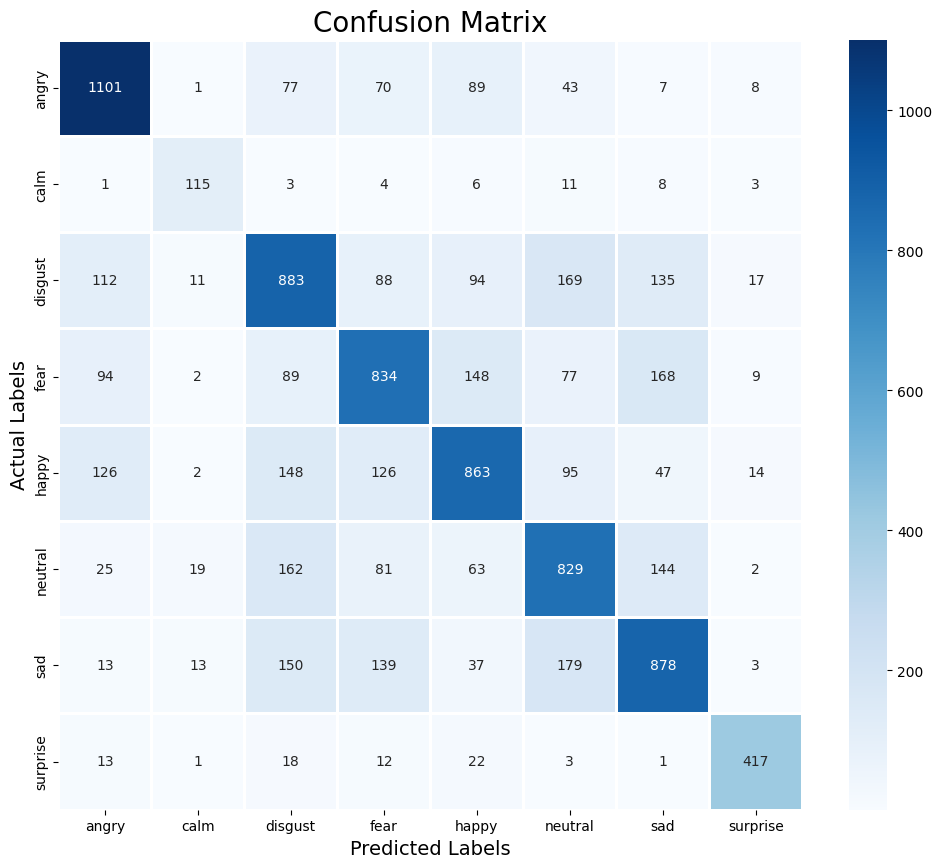

In [265]:
#create a confusion matrix
cm = confusion_matrix(y_test_1, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [217]:
print(cm)

         angry calm disgust fear happy neutral  sad surprise
angry     1101    1      77   70    89      43    7        8
calm         1  115       3    4     6      11    8        3
disgust    112   11     883   88    94     169  135       17
fear        94    2      89  834   148      77  168        9
happy      126    2     148  126   863      95   47       14
neutral     25   19     162   81    63     829  144        2
sad         13   13     150  139    37     179  878        3
surprise    13    1      18   12    22       3    1      417


In [216]:
#classification report
print(classification_report(y_test_1, y_pred))

              precision    recall  f1-score   support

       angry       0.74      0.79      0.76      1396
        calm       0.70      0.76      0.73       151
     disgust       0.58      0.59      0.58      1509
        fear       0.62      0.59      0.60      1421
       happy       0.65      0.61      0.63      1421
     neutral       0.59      0.63      0.61      1325
         sad       0.63      0.62      0.63      1412
    surprise       0.88      0.86      0.87       487

    accuracy                           0.65      9122
   macro avg       0.67      0.68      0.68      9122
weighted avg       0.65      0.65      0.65      9122



## CNN + LSTM Model

In [253]:
# Initialize the model
model_rnn = Sequential()

# Convolutional layers with BatchNormalization
model_rnn.add(Conv1D(512, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
model_rnn.add(BatchNormalization())
model_rnn.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))

model_rnn.add(Conv1D(256, kernel_size=3, activation='relu'))
model_rnn.add(BatchNormalization())
model_rnn.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))

model_rnn.add(Conv1D(128, kernel_size=3, activation='relu'))  # Reduced filters here
model_rnn.add(BatchNormalization())
model_rnn.add(AveragePooling1D(pool_size=3, strides=2, padding='same'))

# Reshape for LSTM input (batch_size, timesteps, features_per_timestep)
model_rnn.add(Reshape((-1, 128)))  

# LSTM layer for temporal dependencies
model_rnn.add(LSTM(64, return_sequences=False))  

# Fully connected layers
model_rnn.add(Dense(units=128, activation='relu', kernel_regularizer=l2(0.001)))  # Lower L2 regularization
model_rnn.add(Dropout(0.1))  # Increased dropout rate
model_rnn.add(Dense(units=8, activation='softmax'))

# Model summary
model_rnn.summary()

# Compile the model
model_rnn.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train the model
history_rnn = model_rnn.fit(
    x_train, y_train,
    batch_size=32,
    epochs=50,
    validation_data=(x_test, y_test),
    callbacks=[lr_scheduler]
)



Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_40 (Conv1D)              │ (None, 160, 512)       │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 160, 512)       │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_28 (MaxPooling1D) │ (None, 80, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_41 (Conv1D)              │ (None, 78, 256)        │       393,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 78, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_29 (MaxPooling1D) │ (None, 39, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_42 (Conv1D)              │ (None, 37, 128)        │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 37, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d_12            │ (None, 19, 128)        │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 19, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_20 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 556,296 (2.12 MB)

 Trainable params: 554,504 (2.12 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 49s 56ms/step - accuracy: 0.2838 - loss: 1.8510 - val_accuracy: 0.3759 - val_loss: 1.6250 - learning_rate: 5.0000e-04
Epoch 2/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 49s 57ms/step - accuracy: 0.4367 - loss: 1.4728 - val_accuracy: 0.4670 - val_loss: 1.4307 - learning_rate: 5.0000e-04
Epoch 3/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 51s 60ms/step - accuracy: 0.5010 - loss: 1.3222 - val_accuracy: 0.4576 - val_loss: 1.5102 - learning_rate: 5.0000e-04
Epoch 4/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 50s 59ms/step - accuracy: 0.5305 - loss: 1.2367 - val_accuracy: 0.4240 - val_loss: 1.4612 - learning_rate: 5.0000e-04
Epoch 5/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 50s 59ms/step - accuracy: 0.5479 - loss: 1.1872 - val_accuracy: 0.4998 - val_loss: 1.3197 - learning_rate: 5.0000e-04
Epoch 6/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 50s 59ms/step - accuracy: 0.5600 - loss: 1.1545 - val_accuracy: 0.5293 - val_loss: 1.2185 - learning_rate: 5.0000e-04
Epoch 7/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 51s 59ms/ste

In [264]:
#passing test data in the model
test_loss, test_accuracy = model_rnn.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6238 - loss: 1.4165
Test Accuracy: 61.43%


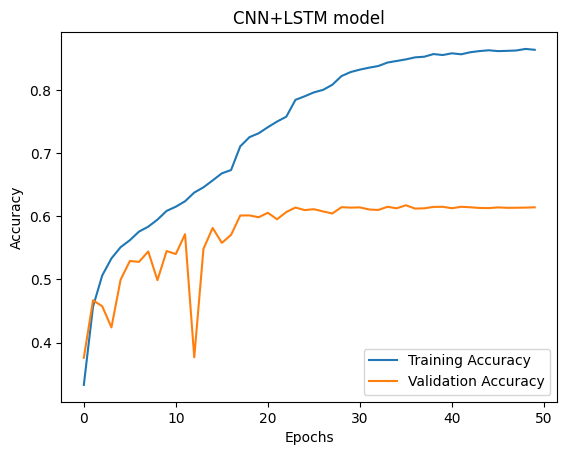

In [254]:
#plot training and validation accuracy
plt.plot(history_rnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN+LSTM model')
plt.legend(loc='lower right')
plt.show()

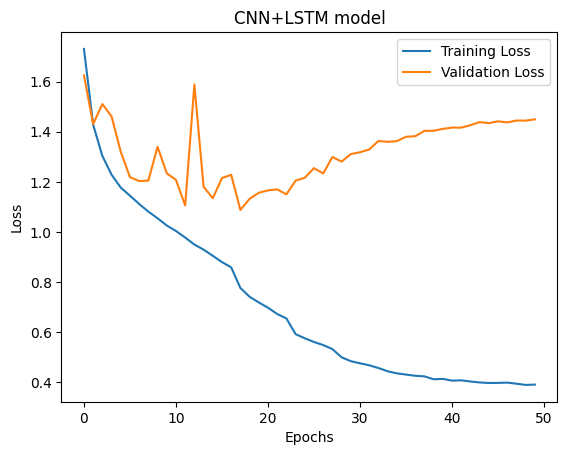

In [255]:
#plot training and validation loss
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN+LSTM model')
plt.legend()
plt.show()

In [256]:
# predicting on test data.
pred_test_2 = model.predict(x_test)
y_pred_2 = encoder.inverse_transform(pred_test_2)
y_test_2 = encoder.inverse_transform(y_test)

286/286 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


In [257]:
#compare the results with actual
df2 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df2['Predicted Labels'] = y_pred_2.flatten()
df2['Actual Labels'] = y_test_2.flatten()
df2.sample(5)

Predicted Labels Actual Labels
4081              sad       neutral
3810              sad           sad
6266            angry         angry
4193            happy         happy
8591         surprise       disgust

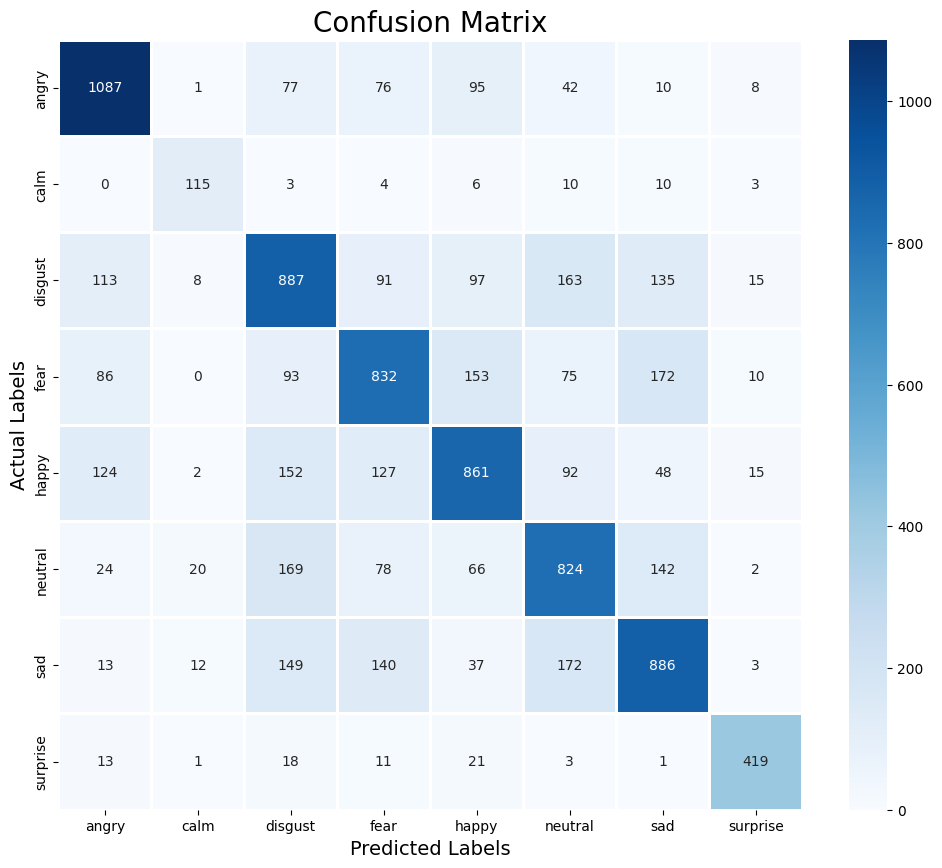

In [258]:
#create a confusion matrix
cm_2 = confusion_matrix(y_test_2, y_pred_2)
plt.figure(figsize = (12, 10))
cm_2 = pd.DataFrame(cm_2 , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm_2, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [259]:
print(cm_2)

         angry calm disgust fear happy neutral  sad surprise
angry     1087    1      77   76    95      42   10        8
calm         0  115       3    4     6      10   10        3
disgust    113    8     887   91    97     163  135       15
fear        86    0      93  832   153      75  172       10
happy      124    2     152  127   861      92   48       15
neutral     24   20     169   78    66     824  142        2
sad         13   12     149  140    37     172  886        3
surprise    13    1      18   11    21       3    1      419


In [260]:
#classification report
print(classification_report(y_test_2, y_pred_2))

              precision    recall  f1-score   support

       angry       0.74      0.78      0.76      1396
        calm       0.72      0.76      0.74       151
     disgust       0.57      0.59      0.58      1509
        fear       0.61      0.59      0.60      1421
       happy       0.64      0.61      0.62      1421
     neutral       0.60      0.62      0.61      1325
         sad       0.63      0.63      0.63      1412
    surprise       0.88      0.86      0.87       487

    accuracy                           0.65      9122
   macro avg       0.68      0.68      0.68      9122
weighted avg       0.65      0.65      0.65      9122

